<a href="https://colab.research.google.com/github/theeraphop44/git-theeraphop-tanjirawattana/blob/main/Design_Your_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xxx_dataset.csv to xxx_dataset (2).csv


In [ ]:
df = pd. read_csv("xxx_dataset.csv")

In [ ]:
df.shape

(400, 11)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'Marriage',
       'work_type', 'Living_type', 'avg_glucose', 'bmi', 'smoking_status',
       'illness'],
      dtype='object')

In [ ]:
df.isnull().any()

gender            False
age               False
hypertension      False
heart_disease     False
Marriage          False
work_type         False
Living_type       False
avg_glucose       False
bmi               False
smoking_status    False
illness           False
dtype: bool

In [ ]:
df.nunique()

gender              2
age                79
hypertension        2
heart_disease       2
Marriage            2
work_type           4
Living_type         2
avg_glucose       393
bmi               199
smoking_status      4
illness             2
dtype: int64

In [ ]:
df.describe(include = 'all')

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
count,400,400.00000,400.000000,400.000000,400,400,400,400.000000,400.000000,400,400.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,214,NaN,NaN,NaN,306,231,201,NaN,NaN,164,NaN
mean,NaN,55.26780,0.180000,0.132500,NaN,NaN,NaN,119.391950,29.481750,NaN,0.500000
std,NaN,22.51279,0.384669,0.339458,NaN,NaN,NaN,54.377459,6.488354,NaN,0.500626
min,NaN,0.80000,0.000000,0.000000,NaN,NaN,NaN,56.070000,15.600000,NaN,0.000000
25%,NaN,44.00000,0.000000,0.000000,NaN,NaN,NaN,80.460000,25.575000,NaN,0.000000
50%,NaN,59.00000,0.000000,0.000000,NaN,NaN,NaN,97.665000,28.600000,NaN,0.500000
75%,NaN,74.25000,0.000000,0.000000,NaN,NaN,NaN,144.345000,33.025000,NaN,1.000000


In [ ]:
df['gender'] = df['gender'] .map({'Female' :1, 'Male' :0})
df['Marriage'] = df['Marriage'] .map({'Yes':1, 'No' :0})
df['work_type'] = df['work_type'] .map({'Private' :0, 'Self-employed' :1, 'Govt_job':2,'children' :3})
df['Living_type'] = df['Living_type'] .map({'Urban':1, 'Rural' :0})
df['smoking_status'] = df['smoking_status'] .map({'formerly smoked' :0, 'never smoked' :1,'smokes' :2,'Unknown' :3})

In [ ]:
df

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1,54.0,0,1,1,0,1,140.28,37.1,0,0
396,0,67.0,0,0,1,2,0,244.28,29.4,0,0
397,0,53.0,0,0,1,0,1,124.16,31.7,1,0
398,0,47.0,0,0,1,0,0,93.55,31.4,1,0


In [ ]:
y = df['illness']
x = df.drop(columns=['illness'])

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status
0,0,67.0,0,1,1,0,1,228.69,36.6,0
1,0,80.0,0,1,1,0,0,105.92,32.5,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2
3,1,79.0,1,0,1,1,0,174.12,24.0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: illness, dtype: int64

In [ ]:
y.value_counts()

1    200
0    200
Name: illness, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status
0,0.0,0.815271,0.0,1.0,1.0,0.000000,1.0,0.800389,0.630631,0.000000
1,0.0,0.975369,0.0,1.0,1.0,0.000000,0.0,0.231140,0.507508,0.333333
2,1.0,0.593596,0.0,0.0,1.0,0.000000,1.0,0.533964,0.564565,0.666667
3,1.0,0.963054,1.0,0.0,1.0,0.333333,0.0,0.547364,0.252252,0.333333
4,0.0,0.987685,0.0,0.0,1.0,0.000000,1.0,0.603422,0.402402,0.000000
...,...,...,...,...,...,...,...,...,...,...
395,1.0,0.655172,0.0,1.0,1.0,0.000000,1.0,0.390458,0.645646,0.000000
396,0.0,0.815271,0.0,0.0,1.0,0.666667,0.0,0.872676,0.414414,0.000000
397,0.0,0.642857,0.0,0.0,1.0,0.000000,1.0,0.315714,0.483483,0.333333
398,0.0,0.568966,0.0,0.0,1.0,0.000000,0.0,0.173784,0.474474,0.333333


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=10),
    keras.layers.Dense(400,activation='sigmoid'),
    keras.layers.Dense(200,activation='sigmoid'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_235 (Dense)           (None, 400)               4400      
                                                                 
 dense_236 (Dense)           (None, 200)               80200     
                                                                 
 dense_237 (Dense)           (None, 100)               20100     
                                                                 
 dense_238 (Dense)           (None, 1)                 101       
                                                                 
Total params: 104801 (409.38 KB)
Trainable params: 104801 (409.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history_model = model.fit(x_train, y_train, epochs = 400)

Epoch 1/400
10/10 [==============================] - 1s 4ms/step - loss: 0.8861 - accuracy: 0.5125
Epoch 2/400
10/10 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.5000
Epoch 3/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 4/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6958 - accuracy: 0.5063
Epoch 5/400
10/10 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.4750
Epoch 6/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4812
Epoch 7/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.4750
Epoch 8/400
10/10 [==============================] - 0s 5ms/step - loss: 0.6897 - accuracy: 0.5188
Epoch 9/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5844
Epoch 10/400
10/10 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.6656
Epoch 11/

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.7072 - accuracy: 0.7625


[0.707200825214386, 0.762499988079071]

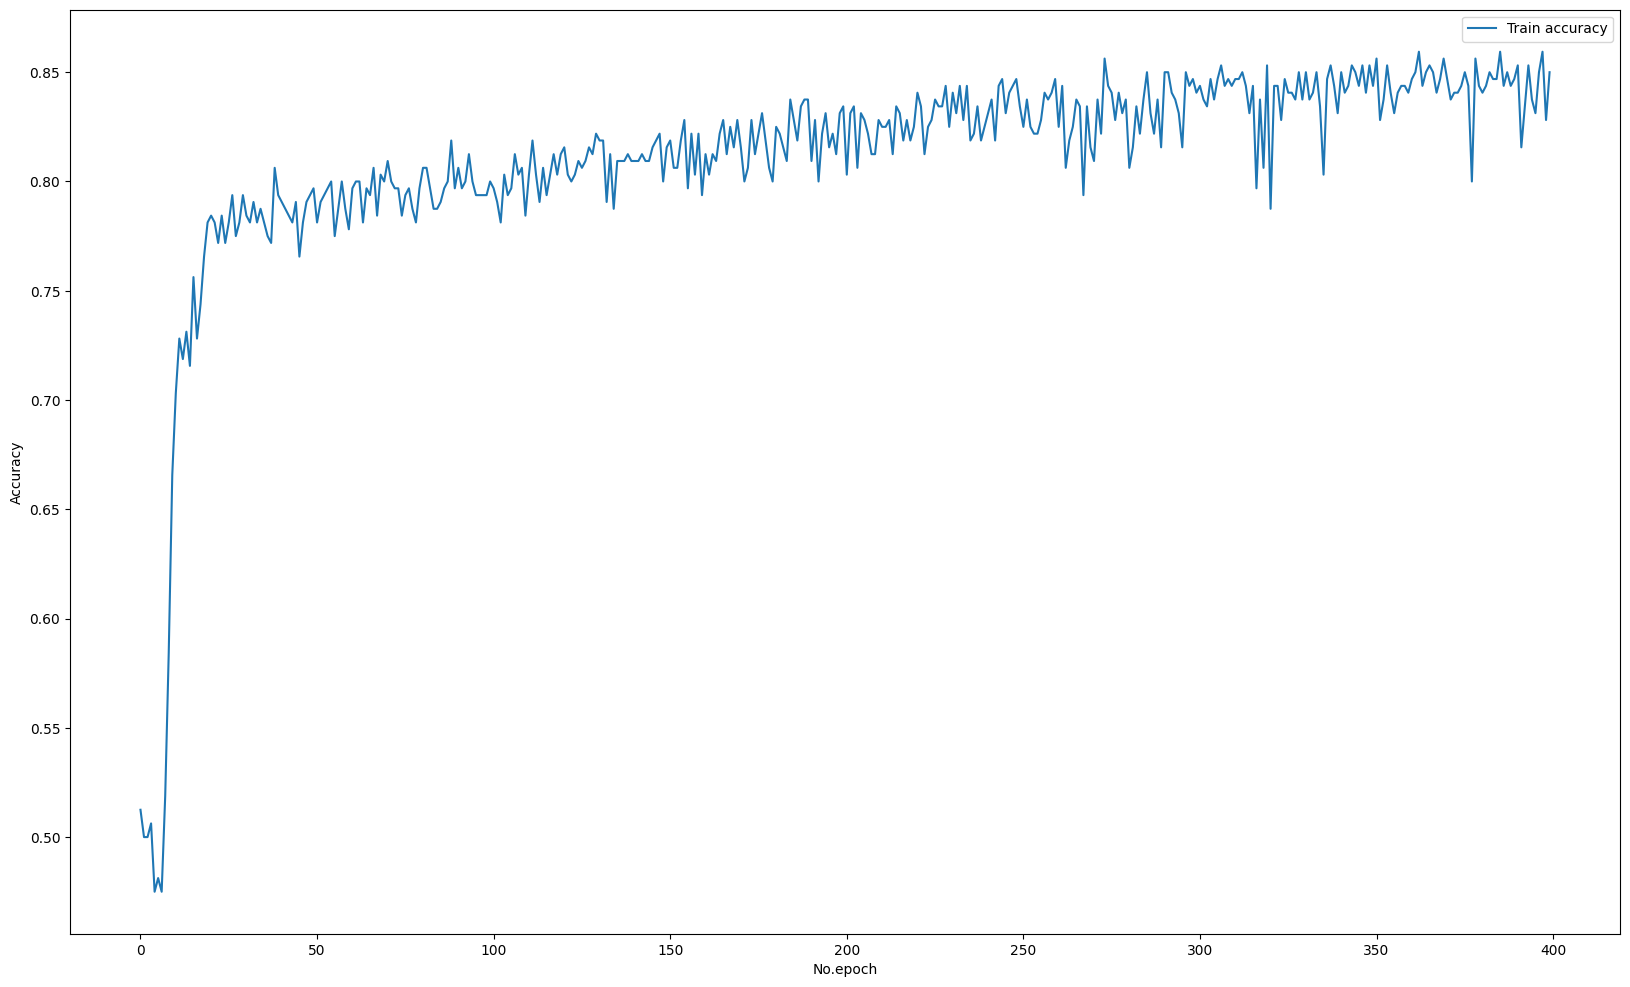

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(history_model.history['accuracy'], label='Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No.epoch')
plt.legend()
plt.show()

In [ ]:
model.save('model.keras')